In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, log_loss, confusion_matrix

# pre processamento
from sklearn.preprocessing import StandardScaler, LabelEncoder

# importando dados
dados = pd.read_csv('winequality-white.csv',sep=';')

# tamanho da base
display(dados.shape)

# visualizando
display(dados.head())
#display(dados.describe())

(4898, 12)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [2]:
display(dados.describe())

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [3]:
# verificando se tem dados nulos
dados.isnull().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

In [4]:
dados['quality'].value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

In [5]:
############ análise da qualidade ############

# total vinhos
total_vinhos = dados.shape[0]

# numero de vinhos com qualidade maior que 6 - Excelente
excelente = dados.loc[(dados['quality'] > 6)]
n_excelentes = excelente.shape[0]

# numero de vinhos com qualidade entre 5 e 6 - Bom
bom = dados.loc[(dados['quality'] >= 5) & (dados['quality'] <= 6)]
n_bom = bom.shape[0]

# numero de vinhos com qualidade menor que 5 - Pessimo
pessimo = dados.loc[(dados['quality'] < 5)]
n_pessimo = pessimo.shape[0]

# porcentagem de vinhos com qualidade maior que 6
porcentagem_excelente = n_excelentes*100/total_vinhos

# ver resultados
print("Total de instancias: {}".format(total_vinhos))
print("Vinhos com qualidade maior que 6 (Excelente): {}".format(n_excelentes))
print("Vinhos com qualidade entre 5 e 6 (Bom): {}".format(n_bom))
print("Vinhos com qualidade menor que 5 (Pessimo): {}".format(n_pessimo))
print("Porcentagem de vinhos excelentes: {:.2f}%".format(porcentagem_excelente))

Total de instancias: 4898
Vinhos com qualidade maior que 6 (Excelente): 1060
Vinhos com qualidade entre 5 e 6 (Bom): 3655
Vinhos com qualidade menor que 5 (Pessimo): 183
Porcentagem de vinhos excelentes: 21.64%


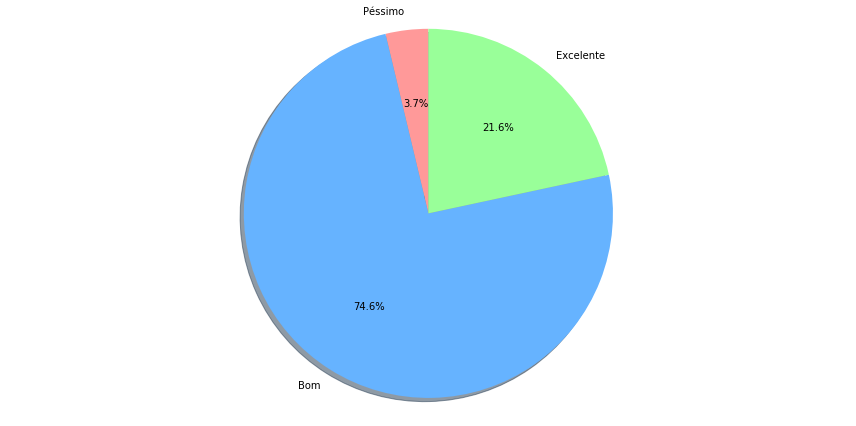

In [6]:
# Grafico de pizza -- percentual de qualidade
labels = ['Péssimo', 'Bom', 'Excelente']
sizes = [n_pessimo, n_bom, n_excelentes]
explode = (0,0,0)

# cores
colors = ['#ff9999','#66b3ff','#99ff99']
fig1, ax1 = plt.subplots(figsize=(12,6))
ax1.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal')
plt.tight_layout()
plt.show()

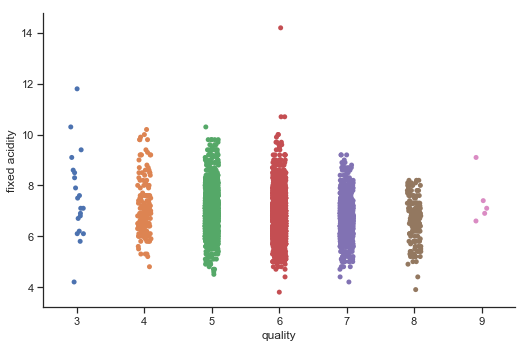

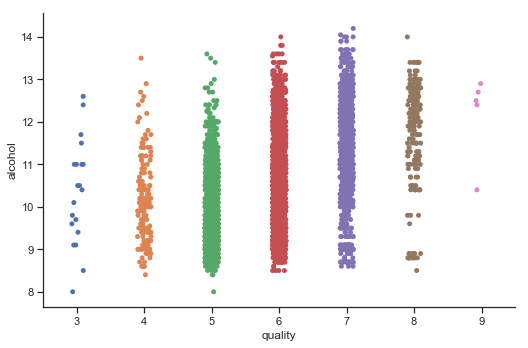

In [7]:
# fixed acidity X quality
sns.set(style="ticks")
sns.catplot(x='quality', y='fixed acidity',data=dados,aspect=1.5)

# alcohol X quality
sns.catplot(x='quality',y='alcohol',data=dados,aspect=1.5)

In [8]:
# separar qualidade das demais classes
y = dados.quality                  
X = dados.drop('quality', axis=1)  
print(y.shape, X.shape)           

(4898,) (4898, 11)


In [9]:
# agrupando vinhos em 2 grupos: qualidade >=7 'bom' resto eh 'ruim'
y1 = (y >= 7).astype(int)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y1, test_size=0.35,random_state=0)

In [11]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(3183, 11) (1715, 11) (3183,) (1715,)


In [12]:
# classificadores
RF_clf = RandomForestClassifier(n_estimators=10)
tree_clf = DecisionTreeClassifier(random_state=0)
gnb_clf = GaussianNB()

In [13]:
# Computando validação cruzada de dobra em k no conjunto de dados de treinamento
# e verificando pontuação de precisão média
cv_scores = cross_val_score(RF_clf,X_train, y_train, cv=10, scoring='accuracy')
print('Maior acurácia -> {}'.format(cv_scores.max()))

Maior acurácia -> 0.8714733542319749


In [14]:
RF_clf.fit(X_train, y_train)
pred_RF = RF_clf.predict(X_test)

In [19]:
# 5 primeiros resultados de predicao
for i in range(0,5):
    print('Qualidade eh ', y_test.iloc[i], ' e o que foi predito foi ', pred_RF[i])

Qualidade eh  0  e o que foi predito eh  0
Qualidade eh  0  e o que foi predito eh  0
Qualidade eh  1  e o que foi predito eh  0
Qualidade eh  1  e o que foi predito eh  1
Qualidade eh  0  e o que foi predito eh  0


In [16]:
# classificados incorretamente
print(confusion_matrix(y_test, pred_RF))

[[1291   52]
 [ 177  195]]


In [17]:
models=[DecisionTreeClassifier(random_state=0),RandomForestClassifier(n_estimators=10),GaussianNB()]
model_names=['Arvore Decisão','Floresta aleatório','Naive Bayes']

acc = []
d = {}

for model in range(len(models)):
    clf = models[model]
    clf.fit(X_train,y_train)
    pred = clf.predict(X_test)
    acc.append(accuracy_score(pred,y_test))
     
d={'Modelo':model_names,'Acurácia':acc}
acc_frame=pd.DataFrame(d)
acc_frame

,Modelo,Acurácia
0,Arvore Decisão,0.810496
1,Floresta aleatório,0.855394
2,Naive Bayes,0.734111


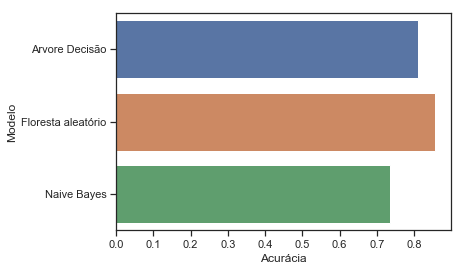

In [18]:
sns.barplot(y='Modelo',x='Acurácia',data=acc_frame)